TextBlob:

It is less sophisticated than deep learning models like FinBERT but provides a quick baseline for sentiment evaluation

In [26]:
# Getting Sentiment Score with VADER
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import BertTokenizer, BertForSequenceClassification
import time
import torch
from tqdm import tqdm
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from huggingface_hub import login
import os
from textblob import TextBlob
import numpy as np


In [29]:
# Load your cleaned data (ensure the CSV file path is correct)
df = pd.read_csv('/notebooks/clean_7days_tweets.csv')
df.head()

datetime  \
0  2022-06-23 23:59:58+00:00   
1  2022-06-23 23:59:57+00:00   
2  2022-06-23 23:59:57+00:00   
3  2022-06-24 23:59:59+00:00   
4  2022-06-24 23:59:55+00:00   

                                                text  \
0                                bitcoin price index   
1  wow looks so nice have a good feeling about th...   
2                       i mean bitcoin might beat it   
3                                bitcoin price index   
4  nope we in a bull run again bitcoin up 20 percent   

                                              tokens  \
0                      ['bitcoin', 'price', 'index']   
1  ['wow', 'looks', 'nice', 'good', 'feeling', 'd...   
2               ['mean', 'bitcoin', 'might', 'beat']   
3                      ['bitcoin', 'price', 'index']   
4  ['nope', 'bull', 'run', 'bitcoin', '20', 'perc...   

                                            pos_tags  \
0  [('bitcoin', 'NN'), ('price', 'NN'), ('index',...   
1  [('wow', 'NN'), ('looks', 'VBZ'), ('nice', 'JJ...   
2  [('mean', 'JJ'), ('bitcoin', 'NN'), ('might', ...   
3  [('bitcoin', 'NN'), ('price', 'NN'), ('index',...   
4  [('nope', 'RB'), ('bull', 'NN'), ('run', 'VB')...   

                                   lemmatized_tokens  \
0                      ['bitcoin', 'price', 'index']   
1  ['wow', 'look', 'nice', 'good', 'feeling', 'dr...   
2               ['mean', 'bitcoin', 'might', 'beat']   
3                      ['bitcoin', 'price', 'index']   
4  ['nope', 'bull', 'run', 'bitcoin', '20', 'perc...   

                                      stemmed_tokens  \
0                      ['bitcoin', 'price', 'index']   
1  ['wow', 'look', 'nice', 'good', 'feel', 'drop'...   
2               ['mean', 'bitcoin', 'might', 'beat']   
3                      ['bitcoin', 'price', 'index']   
4  ['nope', 'bull', 'run', 'bitcoin', '20', 'perc...   

                                cleaned_text  
0                        bitcoin price index  
1  wow look nice good feeling drop dm collab  
2                    mean bitcoin might beat  
3                        bitcoin price index  
4           nope bull run bitcoin 20 percent

In [30]:
print(df['cleaned_text'].isnull().sum())
# SOME MISSING NAN FOUND LETS CLEARN DATA FUERTHER

508


In [31]:
df['cleaned_text'] = df['cleaned_text'].fillna('')

In [34]:
# We need only date and clean_text column
df = df[["datetime", "cleaned_text"]]

In [33]:
df.head()

datetime                               cleaned_text
0  2022-06-23 23:59:58+00:00                        bitcoin price index
1  2022-06-23 23:59:57+00:00  wow look nice good feeling drop dm collab
2  2022-06-23 23:59:57+00:00                    mean bitcoin might beat
3  2022-06-24 23:59:59+00:00                        bitcoin price index
4  2022-06-24 23:59:55+00:00           nope bull run bitcoin 20 percent

In [35]:
df = df.rename(columns={"cleaned_text": "text"})  # Rename 'cleaned_text' to 'text'



In [36]:
# Define a function for TextBlob sentiment analysis
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Sentiment score between -1 and 1

# Apply TextBlob sentiment analysis with progress tracking
def apply_textblob_sentiment(df):
    start_time = time.time()
    total_rows = len(df)
    
    sentiment_scores = []
    for idx, text in enumerate(df['text']):
        sentiment_scores.append(get_textblob_sentiment(str(text)))  # Ensure text is string
        if idx % 1000 == 0 or idx == total_rows - 1:  # Update progress every 1000 rows
            progress = (idx + 1) / total_rows * 100
            elapsed_time = time.time() - start_time
            print(f"Progress: {progress:.2f}% | Time Elapsed: {elapsed_time:.2f}s")

    df['textblob_sentiment'] = sentiment_scores
    return df

# Run sentiment analysis
df = apply_textblob_sentiment(df)

# Save the output
df.to_csv("/notebooks/Sentiment_With_TextBlob.csv", index=False)

print("TextBlob Sentiment Analysis Completed and Saved!")


Progress: 0.00% | Time Elapsed: 0.00s
Progress: 0.38% | Time Elapsed: 0.13s
Progress: 0.75% | Time Elapsed: 0.24s
Progress: 1.12% | Time Elapsed: 0.36s
Progress: 1.50% | Time Elapsed: 0.46s
Progress: 1.87% | Time Elapsed: 0.58s
Progress: 2.25% | Time Elapsed: 0.70s
Progress: 2.62% | Time Elapsed: 0.81s
Progress: 3.00% | Time Elapsed: 0.92s
Progress: 3.37% | Time Elapsed: 1.03s
Progress: 3.75% | Time Elapsed: 1.14s
Progress: 4.12% | Time Elapsed: 1.25s
Progress: 4.50% | Time Elapsed: 1.36s
Progress: 4.87% | Time Elapsed: 1.47s
Progress: 5.25% | Time Elapsed: 1.58s
Progress: 5.62% | Time Elapsed: 1.69s
Progress: 6.00% | Time Elapsed: 1.81s
Progress: 6.37% | Time Elapsed: 1.92s
Progress: 6.75% | Time Elapsed: 2.03s
Progress: 7.12% | Time Elapsed: 2.13s
Progress: 7.50% | Time Elapsed: 2.24s
Progress: 7.87% | Time Elapsed: 2.35s
Progress: 8.25% | Time Elapsed: 2.47s
Progress: 8.62% | Time Elapsed: 2.59s
Progress: 9.00% | Time Elapsed: 2.70s
Progress: 9.37% | Time Elapsed: 2.81s
Progress: 9.

In [24]:
# Load the processed dataset
df_TextBlob = pd.read_csv('/notebooks/Sentiment_With_TextBlob.csv')

# Display first 10 rows
print(df_TextBlob.head(10))


                    datetime  \
0  2022-06-23 23:59:58+00:00   
1  2022-06-23 23:59:57+00:00   
2  2022-06-23 23:59:57+00:00   
3  2022-06-24 23:59:59+00:00   
4  2022-06-24 23:59:55+00:00   
5  2022-06-24 23:59:51+00:00   
6  2022-06-24 23:59:44+00:00   
7  2022-06-24 23:59:41+00:00   
8  2022-06-24 23:59:38+00:00   
9  2022-06-24 23:59:34+00:00   

                                                text  textblob_sentiment  
0                                bitcoin price index            0.000000  
1          wow look nice good feeling drop dm collab            0.466667  
2                            mean bitcoin might beat           -0.312500  
3                                bitcoin price index            0.000000  
4                   nope bull run bitcoin 20 percent            0.000000  
5                                          long live            0.043182  
6  rev 3 gekkoscience newpac usb bitcoin miner 28...            0.136364  
7  fun fact massive double top reversal pattern

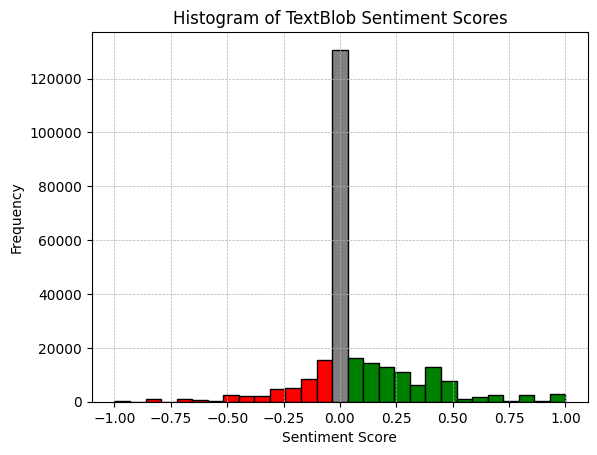

In [27]:
# Define your sentiment data and bins
data = df_TextBlob['textblob_sentiment']
bins = np.linspace(-1, 1, 30)  # Adjust the number of bins as needed

# Plot the histogram and capture the patches (bars)
counts, edges, patches = plt.hist(data, bins=bins, edgecolor='black')

# Colorize each bin based on its range:
for patch, left, right in zip(patches, edges[:-1], edges[1:]):
    if left < 0 and right > 0:
        patch.set_facecolor('grey')   # Neutral
    elif right <= 0:
        patch.set_facecolor('red')      # Negative
    else:
        patch.set_facecolor('green')    # Positive

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of TextBlob Sentiment Scores')
plt.show()
